In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Datos de entrenamiento: {x_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {x_test.shape}, {y_test.shape}")


Datos de entrenamiento: (60000, 28, 28), (60000,)
Datos de prueba: (10000, 28, 28), (10000,)


## Preprocesamiento

In [4]:
# Normalizar los datos a valores entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0


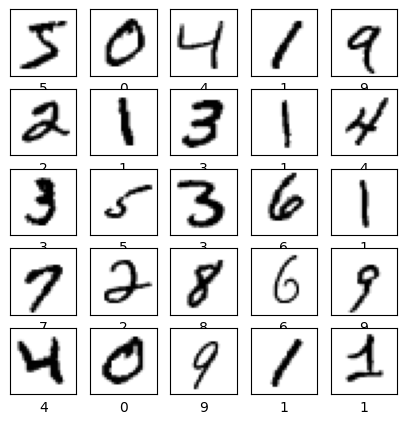

In [5]:
# Visualizar las primeras 25 imágenes de entrenamiento
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [6]:
# Crear el modelo de la red neuronal
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),       # Capa de entrada que aplana la imagen 28x28
    layers.Dense(128, activation='relu'),       # Capa oculta con 128 neuronas y activación ReLU
    layers.Dropout(0.2),                        # Capa de dropout para prevenir sobreajuste
    layers.Dense(10, activation='softmax')      # Capa de salida con 10 neuronas para las 10 clases
])


c:\Users\JUAN BERNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8626 - loss: 0.4786 - val_accuracy: 0.9592 - val_loss: 0.1433
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9549 - loss: 0.1479 - val_accuracy: 0.9701 - val_loss: 0.1048
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9668 - loss: 0.1099 - val_accuracy: 0.9735 - val_loss: 0.0866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.0830 - val_accuracy: 0.9770 - val_loss: 0.0785
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9781 - loss: 0.0728 - val_accuracy: 0.9786 - val_loss: 0.0723


In [10]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nPrecisión en el conjunto de prueba:', test_acc)


313/313 - 0s - 815us/step - accuracy: 0.9786 - loss: 0.0723

Precisión en el conjunto de prueba: 0.978600025177002


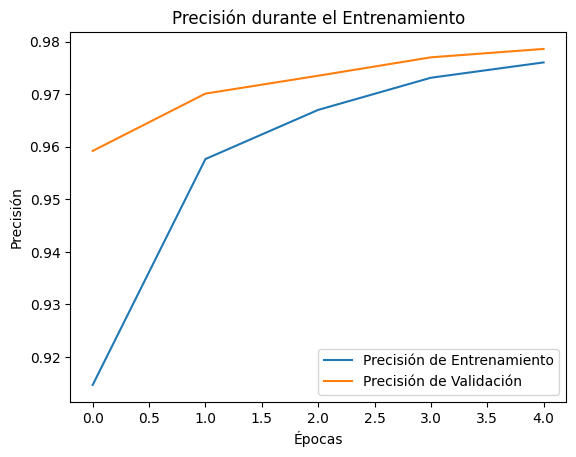

In [11]:
# Graficar la precisión del entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el Entrenamiento')
plt.legend(loc='lower right')
plt.show()
